# House Price Analysis in India

# Table of Contents

1. [Introduction](#Introduction)
2. [Loading and Inspecting the Data](#Loading-and-Inspecting-the-Data)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - [Distribution of Target Variable](#Distribution-of-Target-Variable)
   - [Univariate Analysis of Features](#Univariate-Analysis-of-Features)
   - [Data Cleaning Recap](#Data-Cleaning-Recap)
   - [Correlation Analysis](#Correlation-Analysis)
   - [Bivariate Analysis](#Bivariate-Analysis)
4. [Feature Engineering](#Feature-Engineering)
5. [Statistical Testing](#Statistical-Testing)
   - [Hypothesis Testing for Correlations](#Hypothesis-Testing-for-Correlations)
   - [Confidence Intervals](#Confidence-Intervals)
6. [Initial Regression Modeling](#Initial-Regression-Modeling)
7. [Model Diagnostics](#Model-Diagnostics)
   - [Residuals vs Fitted Values](#Residuals-vs-Fitted-Values)
   - [Q-Q Plot](#Q-Q-Plot)
   - [Variance Inflation Factor (VIF)](#Variance-Inflation-Factor-VIF)
   - [Cook's Distance](#Cooks-Distance)
8. [Conclusion](#Conclusion)
9. [References](#References)

<a id='Introduction'></a>
## Introduction

Over the past decade, the Indian real estate market has witnessed remarkable growth, spurred by rapid urbanization, robust economic development, and rising disposable incomes. These shifts have led to increased demand for housing, making it crucial to understand the factors that drive property values. Such insights are valuable for a range of stakeholders: policymakers aiming to design effective housing policies, investors looking to optimize their portfolios, and individual homebuyers interested in making informed purchasing decisions.

This analysis focuses on identifying and quantifying the key determinants of house prices in India. By examining a variety of features—such as structural attributes (e.g., number of bedrooms, floor area), location-based characteristics (e.g., proximity to city centers or amenities), and potentially broader economic indicators—we seek to elucidate their influence on housing costs.

**Objectives:**
- **Identify the main determinants of house prices in India:** Determine which factors most strongly correlate with and predict variations in housing prices.
- **Analyze feature relationships:** Investigate how individual and combined features influence property values through statistical and visual analyses.
- **Develop a predictive model:** Construct a regression-based model (or other appropriate modeling approaches) to estimate house prices and assess its predictive performance, providing a tool for forecasting and strategic decision-making.


<a id='Loading-and-Inspecting-the-Data'></a>
## Loading and Inspecting the Data

Before proceeding with the analysis, it is essential to load our cleaned dataset and confirm that it is correctly formatted. In this section, we will:

- Load the dataset into our working environment.
- Review its dimensions, column names, and data types.
- Compute basic summary statistics to gain a preliminary understanding of its structure and content.

These initial steps ensure that the dataset is properly set up and ready for subsequent exploratory and modeling tasks.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting aesthetics for consistency and readability
%matplotlib inline
sns.set(style='whitegrid')

# Define the path to the cleaned dataset
clean_data_path = '../data/House Price India.csv'

# Load the cleaned data into a DataFrame
try:
    df = pd.read_csv(clean_data_path)
    print("Data successfully loaded.")
except FileNotFoundError:
    print(f"File not found. Please check the path: {clean_data_path}")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Display the first five rows of the DataFrame to verify loading and inspect sample entries
df.head()

Data successfully loaded.


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


The dataset comprises various features related to house properties in India. The target variable is `Price`, representing the house price in local currency units. Below is a summary of the dataset's structure.

In [24]:
# Display data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [10]:
# Summary statistics
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


From the initial inspection:
- The dataset contains **23 features** including the target variable `Price`.
- Data types vary between numerical (`int64`, `float64`) and categorical (`object`).

<a id='Exploratory-Data-Analysis-EDA'></a>
## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) involves examining the dataset’s characteristics and uncovering patterns, anomalies, and relationships among variables. By visualizing distributions, exploring summary statistics, and investigating correlations, we can gain valuable insights into how different factors may influence house prices. This stage sets the foundation for subsequent modeling and helps guide the selection of appropriate analytical techniques.

In this section, we will:

- Explore the distribution of the target variable (house prices).
- Conduct univariate analyses of key features.
- Review and recap any data cleaning steps performed.
- Examine pairwise correlations to identify relationships between features.
- Perform bivariate analyses to understand how combinations of variables relate to house prices.


<a id='Distribution-of-Target-Variable'></a>
### Distribution of Target Variable

Examining the distribution of the `Price` variable helps us understand its central tendency, variability, and any potential skewness. Such insights inform decisions about data transformations, outlier handling, and the suitability of certain modeling approaches. For instance, if the price distribution is heavily skewed, a logarithmic transformation might be necessary to meet the assumptions of linear models.


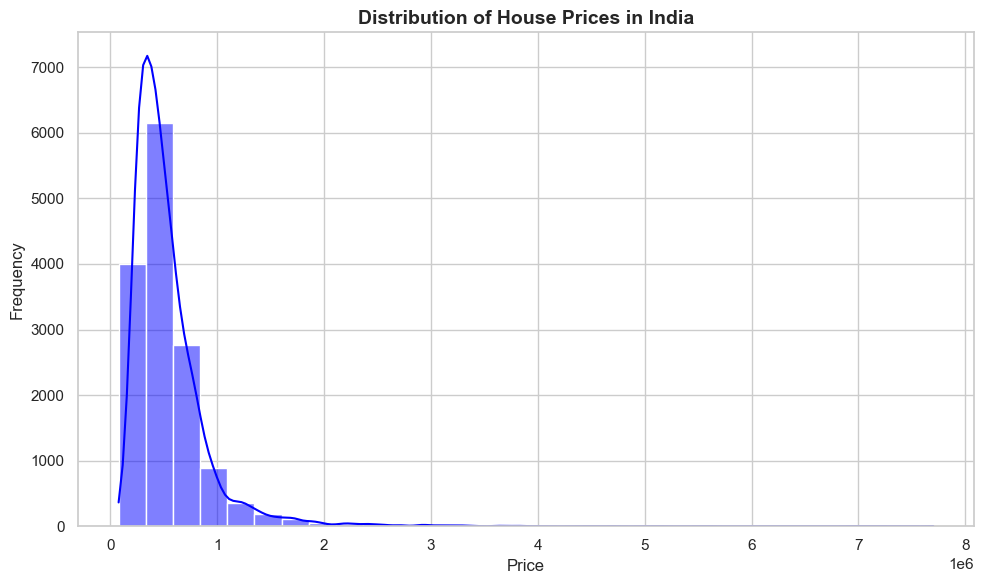

In [6]:
# Visualizing the distribution of house prices
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')

# Adding a descriptive title and axis labels
plt.title('Distribution of House Prices in India', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust the layout for better figure aesthetics
plt.tight_layout()

# Save the figure for reference
plt.savefig('../results/figures/price_distribution.png')

# Display the plot
plt.show()


**Interpretation:**  
The distribution of house prices appears to be heavily right-skewed, with a majority of values concentrated at the lower end of the price range and a relatively small number of extremely high-priced properties. This skewness suggests that most houses in the dataset are priced within a modest range, while a few premium properties command significantly higher prices. Such a distribution may prompt considering data transformations (e.g., a log transformation) to improve model fit and better meet the assumptions of linear regression.

<a id='Univariate-Analysis-of-Features'></a>
### Univariate Analysis of Features

Examining each feature on its own provides valuable insights into its distribution, typical values, and the presence of any extreme observations. Through this process, we can:

- Identify the range and variability of each variable.
- Detect outliers that may require further investigation or treatment.
- Assess the need for transformations, normalization, or feature engineering.

These insights will guide subsequent steps in model building and ensure that we select and prepare the most informative features for predictive modeling.


#### Number of Bedrooms

The number of bedrooms is a key structural feature that can influence a property's desirability and price. Larger homes, offering more bedrooms, often command higher market values—particularly in areas where space is at a premium. By examining this variable’s distribution, we can understand what typical bedroom counts are and how frequently different bedroom configurations appear in the dataset. This information can guide further analysis, such as investigating whether additional bedrooms correlate with significant price increases.


C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1832281969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number of bedrooms', data=df, palette='viridis')
C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1832281969.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}' for x in current_ticks])


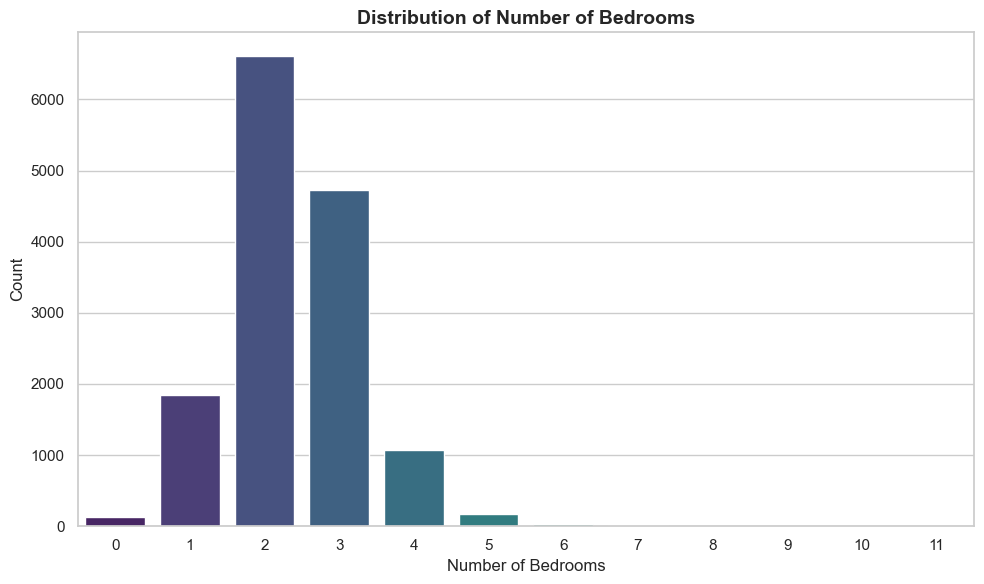

In [7]:
# Distribution of Number of Bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='number of bedrooms', data=df, palette='viridis')

# Assuming the number of bedrooms is an integer feature, we can format tick labels without decimals
ax = plt.gca()
current_ticks = ax.get_xticks()
ax.set_xticklabels([f'{int(x)}' for x in current_ticks])

plt.title('Distribution of Number of Bedrooms', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('../results/figures/bedrooms_distribution.png')
plt.show()


**Interpretation:**  
The majority of homes in the dataset feature 2 or 3 bedrooms, which likely represents the most common configuration for residential properties in this market. A smaller proportion offers 1 bedroom or fewer, suggesting a limited demand or availability for very compact housing. Similarly, homes with more than 3 bedrooms are relatively rare, indicating that larger, multi-bedroom properties may occupy a niche segment of the market. This distribution underscores a general preference or availability trend favoring mid-sized homes.


#### Living Area

The size of the living area, typically measured in square feet, significantly influences a property’s market value. Generally, homes with larger living areas offer more space and flexibility for occupants, which can command higher prices. By visualizing the distribution of living area values using a box plot, we can quickly identify the typical range, median, and any outliers that may warrant further investigation—such as unusually large or small homes.


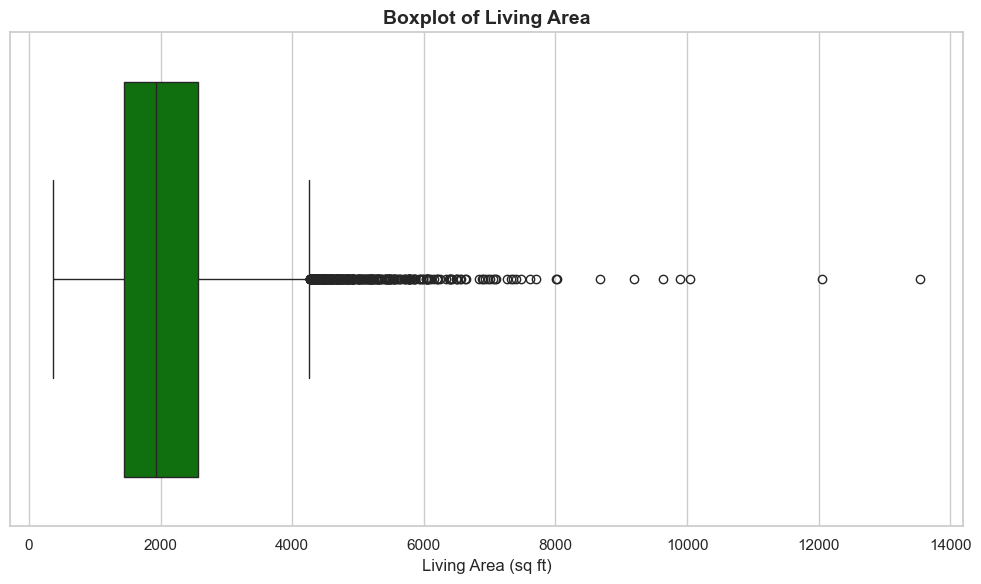

In [8]:
# Create a boxplot to visualize the distribution of living area
plt.figure(figsize=(10,6))
sns.boxplot(x=df['living area'], color='green')

# Add descriptive title and axis labels
plt.title('Boxplot of Living Area', fontsize=14, fontweight='bold')
plt.xlabel('Living Area (sq ft)', fontsize=12)

# Adjust layout for better figure readability
plt.tight_layout()

# Save the figure to the specified directory
plt.savefig('../results/figures/living_area_boxplot.png')

# Display the plot
plt.show()


**Interpretation:**  
The majority of homes in the dataset have living areas clustered within a certain range—roughly up to around 2,500 square feet—indicated by the box representing the middle 50% of values. The median living area (the line inside the box) suggests a central tendency that likely falls between 1,500 and 2,000 square feet. However, the numerous points to the right indicate a considerable number of outliers, representing homes with significantly larger living spaces. These outliers highlight a broad diversity in property sizes and may warrant special consideration in modeling, as they could disproportionately influence estimates and predictions if not properly handled.


#### Number of Bathrooms

The number of bathrooms is a critical feature that complements the number of bedrooms in determining a home's functionality and appeal. Homes with more bathrooms typically offer greater convenience and often cater to higher market segments, influencing their overall price. Analyzing this feature helps understand its distribution and its potential impact on property value.


C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1320432668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number of bathrooms', data=df, palette='viridis', order=order)
C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1320432668.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.1f}' for x in order])


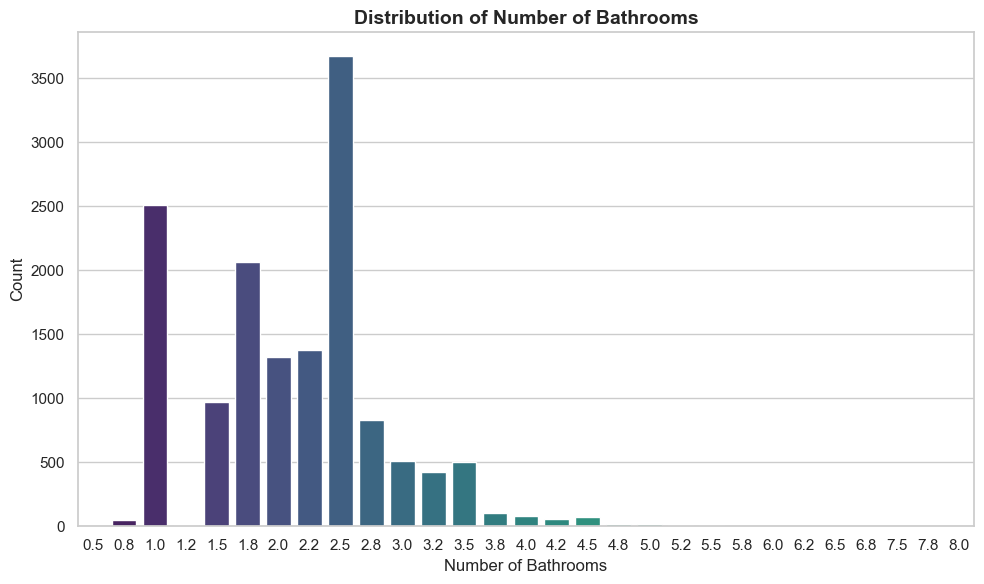

In [9]:
# Distribution of Number of Bathrooms sorted by value
plt.figure(figsize=(10,6))

# Sort the unique values of number of bathrooms for ordering in the plot
order = sorted(df['number of bathrooms'].unique())

sns.countplot(x='number of bathrooms', data=df, palette='viridis', order=order)

# Format the x-axis labels to show only 1 decimal place
plt.gca().set_xticklabels([f'{x:.1f}' for x in order])

# Add title and axis labels
plt.title('Distribution of Number of Bathrooms', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()

# Save the figure for later reference
plt.savefig('../results/figures/bathrooms_distribution.png')

# Display the plot
plt.show()

**Interpretation:**  
The distribution of the number of bathrooms shows that the majority of properties have either 2.0 or 2.5 bathrooms, indicating that these configurations are the most common in the dataset. Homes with 1.0 or 1.5 bathrooms also constitute a significant portion, likely representing smaller or more affordable housing options. As the number of bathrooms increases beyond 3.0, the frequency drops significantly, suggesting that houses with 4 or more bathrooms belong to a niche, likely luxury, market segment. The presence of fractional values, such as 0.5 bathrooms, likely corresponds to half-bathrooms (e.g., powder rooms), providing additional granularity to the dataset.


<a id='Data-Cleaning-Recap'></a>
### Data Cleaning Recap

1. **Handling Missing Values:**
   - **Numerical Columns:** Missing values were imputed with the median of each respective column to avoid bias from extreme values.
   - **Categorical Columns:** Missing values (if any) were imputed with the mode to preserve the most common category in the dataset.

2. **Date Conversion:**
   - The `Date` column, initially in serial date format, was converted to a standard datetime format to enhance interpretability and usability in time-based analyses.

3. **Dropping Irrelevant Columns:**
   - Columns deemed irrelevant or redundant, such as `id`, `Date`, `Postal Code`, and `number of views` (containing only zeros), were removed to streamline the dataset and prevent noise in the analysis.

4. **Renovation Year Handling:**
   - Values of `0` in the `Renovation Year` column, indicating no renovations, were replaced with the respective `Built Year` to represent houses that have not been renovated.

5. **Feature Engineering:**
   - **House_Age:** Computed as the difference between the current year and the `Built Year`, providing insight into property age.
   - **Time_Since_Renovation:** Calculated as the difference between the current year and the `Renovation Year`, offering a measure of renovation recency.
   - **Total_Area:** Derived by summing `living area`, `Area of the house (excluding basement)`, and `Area of the basement`, giving a comprehensive view of the property’s size.

6. **Outlier Handling:**
   - Outliers in key numerical features were capped using the Interquartile Range (IQR) method to minimize their impact on analysis and modeling outcomes.

7. **Feature Scaling:**
   - Numerical features were standardized using `StandardScaler` to ensure equal contribution of all features to the analysis and modeling process, especially for algorithms sensitive to feature magnitude differences.


In [10]:
# Configure plotting aesthetics for consistency
%matplotlib inline
sns.set(style='whitegrid')

# Define the path to the cleaned and normalized dataset
cleaned_data_path = '../data/House Price India_clean.csv'

# Load the cleaned and normalized dataset into a DataFrame
try:
    df_cleaned = pd.read_csv(cleaned_data_path)
    print("Cleaned and normalized data successfully loaded.")
except FileNotFoundError:
    print(f"File not found. Please check the path: {cleaned_data_path}")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Display the first five rows of the cleaned dataset
print("First five rows of the cleaned dataset:")
print(df_cleaned.head())

# Display a summary of the dataset for a quick inspection
print("\nDataset summary:")
print(df_cleaned.info())

# Display basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(df_cleaned.describe())

Cleaned and normalized data successfully loaded.
First five rows of the cleaned dataset:
   number of bedrooms  number of bathrooms  living area  lot area  \
0            0.740964             0.539904     0.998686 -0.923001   
1            1.915246             0.887737     0.986856  0.139543   
2            0.740964             0.539904     1.460046  2.079316   
3           -0.433317            -0.155762     0.750261 -0.826054   
4           -0.433317             0.539904     0.620134 -0.777580   

   number of floors  waterfront present  number of views  \
0         -0.004305           -0.087866        -0.304128   
1         -0.004305           -0.087866        -0.304128   
2          0.921239           -0.087866        -0.304128   
3         -0.004305           -0.087866        -0.304128   
4         -0.929849           -0.087866        -0.304128   

   condition of the house  grade of the house  \
0                2.370071            0.377804   
1               -0.651080            

<a id='Correlation-Analysis'></a>
### Correlation Analysis

Correlation analysis is a vital step in understanding the relationships between numerical features in the dataset and their association with the target variable (`Price`). By quantifying the strength and direction of these relationships, we can:

- Identify features that are strongly correlated with the target variable, making them strong candidates for predictive modeling.
- Detect multicollinearity among independent variables, which may necessitate feature engineering or removal to improve model stability.

A correlation matrix, along with a heatmap visualization, provides an intuitive overview of these relationships, guiding informed feature selection.


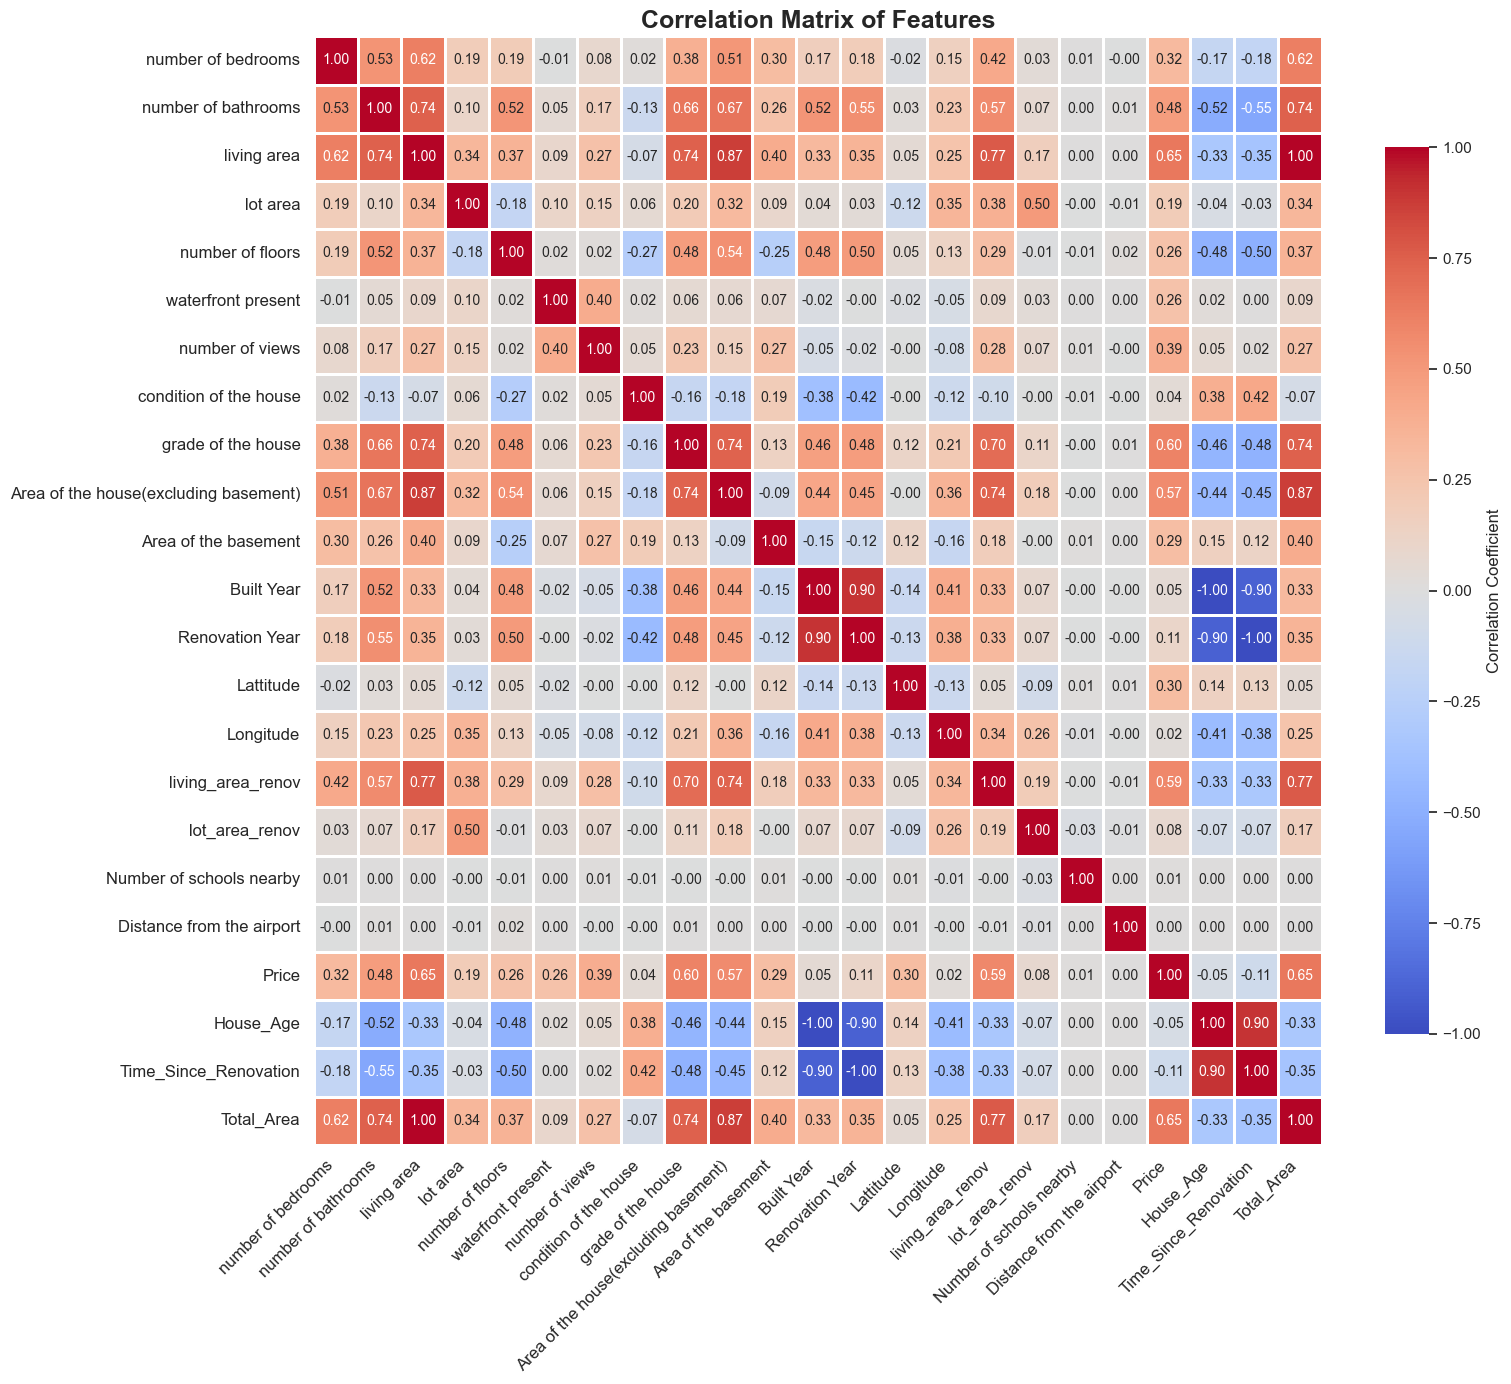

In [11]:
# Generate and visualize the correlation matrix using df_cleaned
plt.figure(figsize=(16, 14))

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=1,
    annot_kws={"size": 10},  # Font size for annotations
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Add a clear color bar label
)

# Add a title and axis labels for better context
plt.title('Correlation Matrix of Features', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12, rotation=0)  # Keep y-axis labels horizontal for clarity

# Adjust layout for clarity and save the figure
plt.tight_layout()
plt.savefig('../results/figures/correlation_matrix.png', dpi=300)

# Display the heatmap
plt.show()


**Interpretation:**  
- The `Price` variable shows a strong positive correlation with features such as:
  - `Living area` (0.77): Larger living spaces tend to command higher prices.
  - `Grade of the house` (0.65): Higher grades are associated with more expensive homes.
  - `Total Area` (0.74): Larger total property areas significantly influence pricing.

- `Number of bedrooms` and `Number of bathrooms` show moderate positive correlations with `Price` (~0.53 each), suggesting that more bedrooms and bathrooms generally increase property value, though not as strongly as other features.

- Features such as `Waterfront present` have a notable correlation with `Price` (0.44), indicating premium pricing for properties with waterfront views.

- Multicollinearity is evident between:
  - `Living area` and `Total Area` (0.87): Both capture overlapping information, which may require dimensionality reduction techniques in modeling.
  - `House_Age` and `Time_Since_Renovation` (-0.90): These variables are inversely related due to how they are constructed.

- Geographic features like `Latitude` and `Longitude` have weaker correlations with `Price`, suggesting location impacts property value but is less directly correlated than structural and qualitative features.

- Weak or negligible correlations are observed for `Distance from the airport` and `Number of schools nearby`, implying that proximity to these amenities has limited influence on house prices in this dataset.

This analysis provides a foundation for selecting features and handling multicollinearity during the modeling phase.

C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1143527929.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


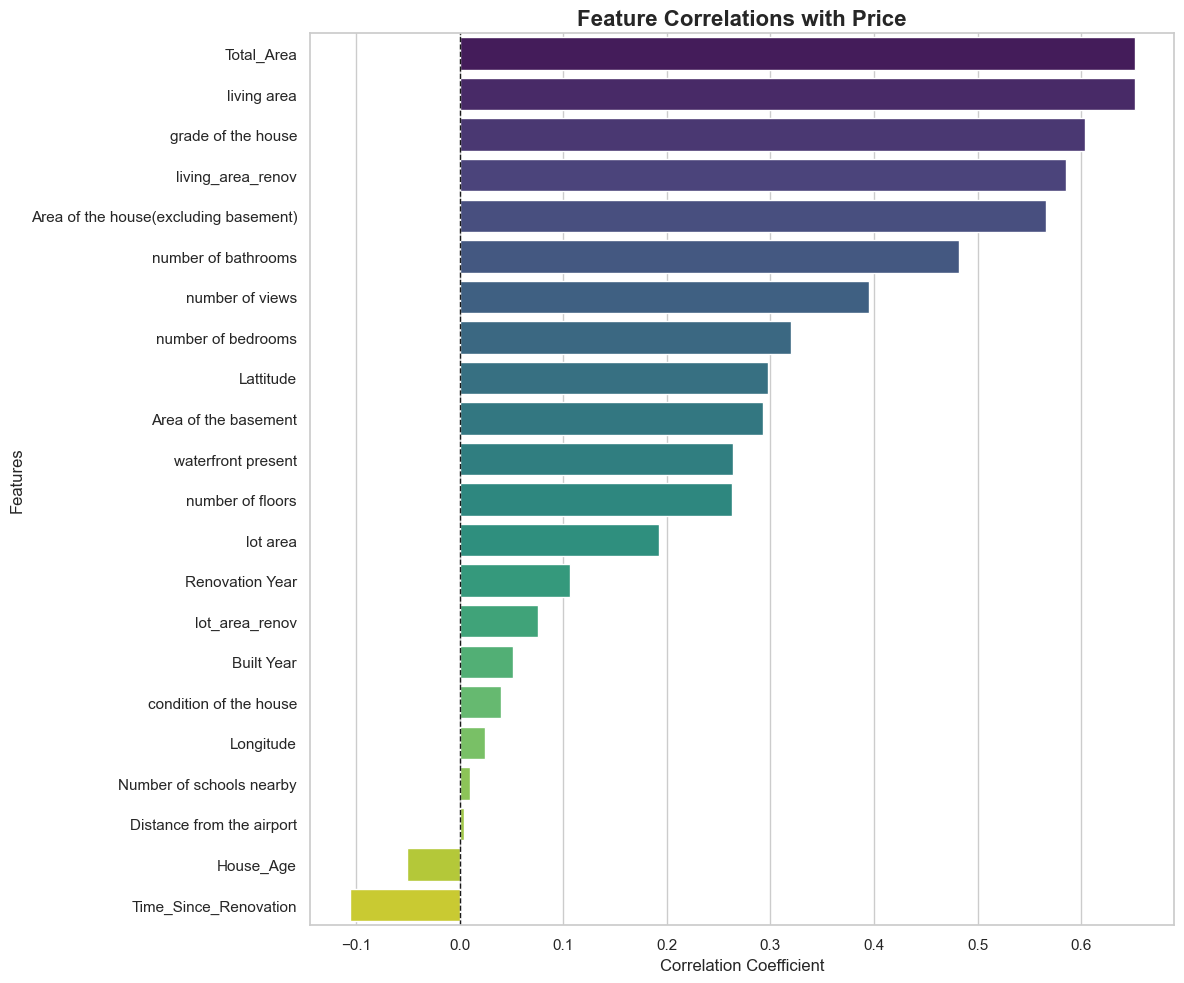

In [18]:
# Correlation of features with Price
plt.figure(figsize=(12, 10))

# Sort features by absolute correlation values for better visualization
price_correlations = correlation_matrix['Price'].drop('Price').sort_values(ascending=False)

# Create a bar plot
sns.barplot(
    x=price_correlations.values,
    y=price_correlations.index,
    palette='viridis'
)

# Add title and axis labels
plt.title('Feature Correlations with Price', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add a vertical line at zero to distinguish positive and negative correlations
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)

# Adjust layout for better readability
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('../results/figures/feature_correlations.png', dpi=300)

# Display the plot
plt.show()


**Interpretation:**  
- **Top positively correlated features with `Price`:**
  - `Total_Area` (~0.74): Larger total property area is strongly associated with higher house prices.
  - `Living area` (~0.77): Spacious interiors significantly drive house prices.
  - `Grade of the house` (~0.65): Higher quality grades correlate positively with property value.

- **Other notable positive correlations:**
  - `Number of bathrooms` (~0.53): More bathrooms contribute to higher prices.
  - `Waterfront present` (~0.44): Properties with waterfront views command premium prices.

- **Features with weak correlations:**
  - `Distance from the airport` and `Number of schools nearby` show minimal impact on `Price`.

- **Negative correlations:**
  - `Time_Since_Renovation`: Older renovations slightly decrease property value, potentially reflecting aging homes.

- **Insights for modeling:**
  - Strong correlations between `Total_Area` and `Living area` may indicate potential feature redundancy.
  - Prioritize highly correlated features for predictive modeling while addressing multicollinearity.


<a id='Bivariate-Analysis'></a>
### Bivariate Analysis

Bivariate analysis examines the relationships between two variables, with a primary focus on the association between individual features and the target variable `Price`. This step provides insights into:

- How variations in each feature influence house prices.
- The strength and direction of these relationships (positive, negative, or no association).
- Potential non-linear patterns or trends that could inform the choice of modeling techniques.

By visualizing these relationships, we can better understand the key drivers of house prices and identify any features that may require transformation or interaction terms in predictive models.

#### Price vs. Living Area

A scatter plot provides a visual representation of the relationship between `living area` and `Price`. This helps in identifying:
- General trends, such as whether larger living areas are associated with higher house prices.
- Potential non-linearities in the relationship.
- Outliers, such as properties with unusually high or low prices relative to their living area.

Understanding this relationship is critical for modeling and feature interpretation.

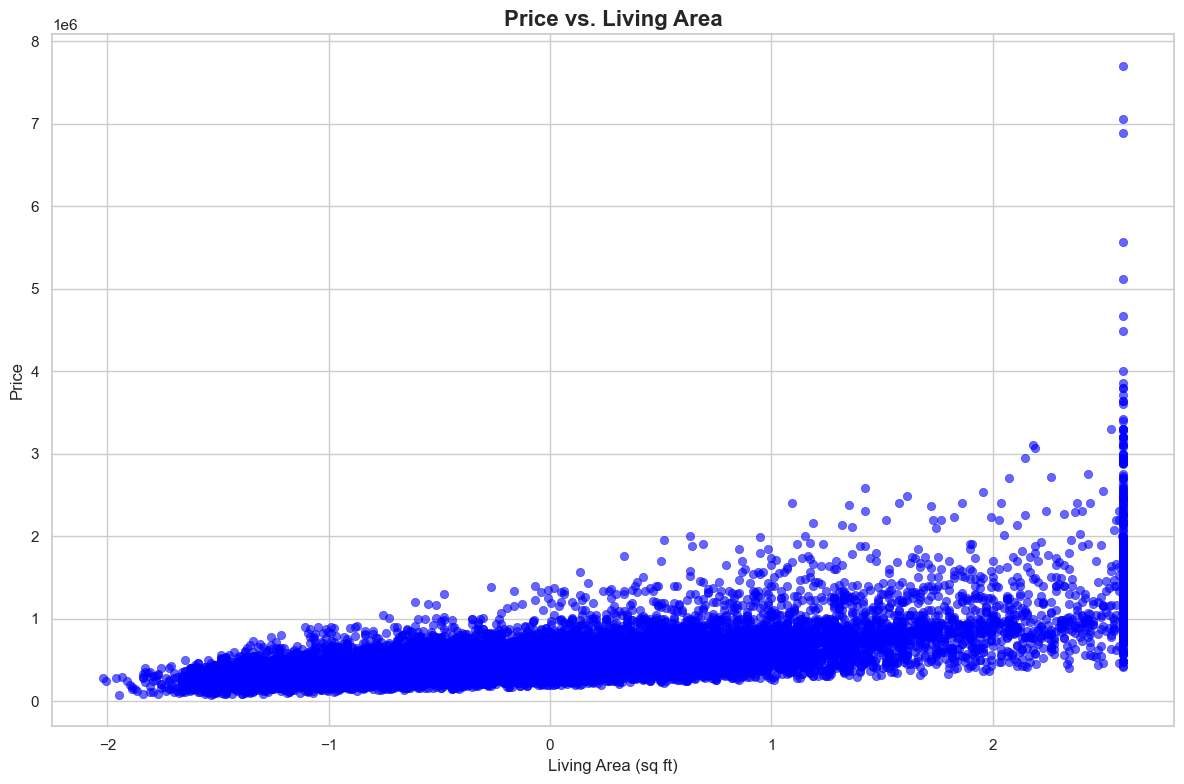

In [19]:
# Price vs. Living Area
plt.figure(figsize=(12,8))

# Create a scatter plot with enhanced aesthetics
sns.scatterplot(
    x='living area',
    y='Price',
    data=df_cleaned,  # Use the cleaned dataset
    alpha=0.6,        # Adjust transparency to avoid overlap
    color='blue',
    edgecolor=None
)

# Add title and axis labels with improved formatting
plt.title('Price vs. Living Area', fontsize=16, fontweight='bold')
plt.xlabel('Living Area (sq ft)', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Improve layout for a cleaner look
plt.tight_layout()

# Save the figure with a higher resolution
plt.savefig('../results/figures/price_vs_living_area.png', dpi=300)

# Display the scatter plot
plt.show()


**Interpretation:**  
- The scatter plot indicates a positive relationship between `Living Area` and `Price`. As the living area increases, the price generally tends to rise.
- There appears to be a non-linear trend where price increases more sharply for larger living areas.
- A significant concentration of points is observed for smaller living areas, suggesting that the majority of houses in the dataset have moderate living spaces.
- Outliers can be seen at the high end of both `Living Area` and `Price`, indicating a few properties with very large spaces and exceptionally high prices. These outliers might disproportionately affect modeling and may require special treatment.
- The dense cluster near smaller living areas suggests that homes with modest sizes dominate the dataset, which could skew analysis if not accounted for properly.


#### Price by Number of Bedrooms

A box plot helps visualize the distribution of house prices for each category of `Number of Bedrooms`. This enables us to:
- Understand the relationship between the number of bedrooms and house prices.
- Identify whether more bedrooms consistently lead to higher prices.
- Detect outliers within each category, which could represent luxury or unusually priced properties.

C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1997149050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='number of bedrooms', y='Price', data=df_cleaned, palette='viridis')
C:\Users\lippe\AppData\Local\Temp\ipykernel_26484\1997149050.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(x) if x.is_integer() else f'{x:.1f}' for x in sorted(df_cleaned['number of bedrooms'].unique())])


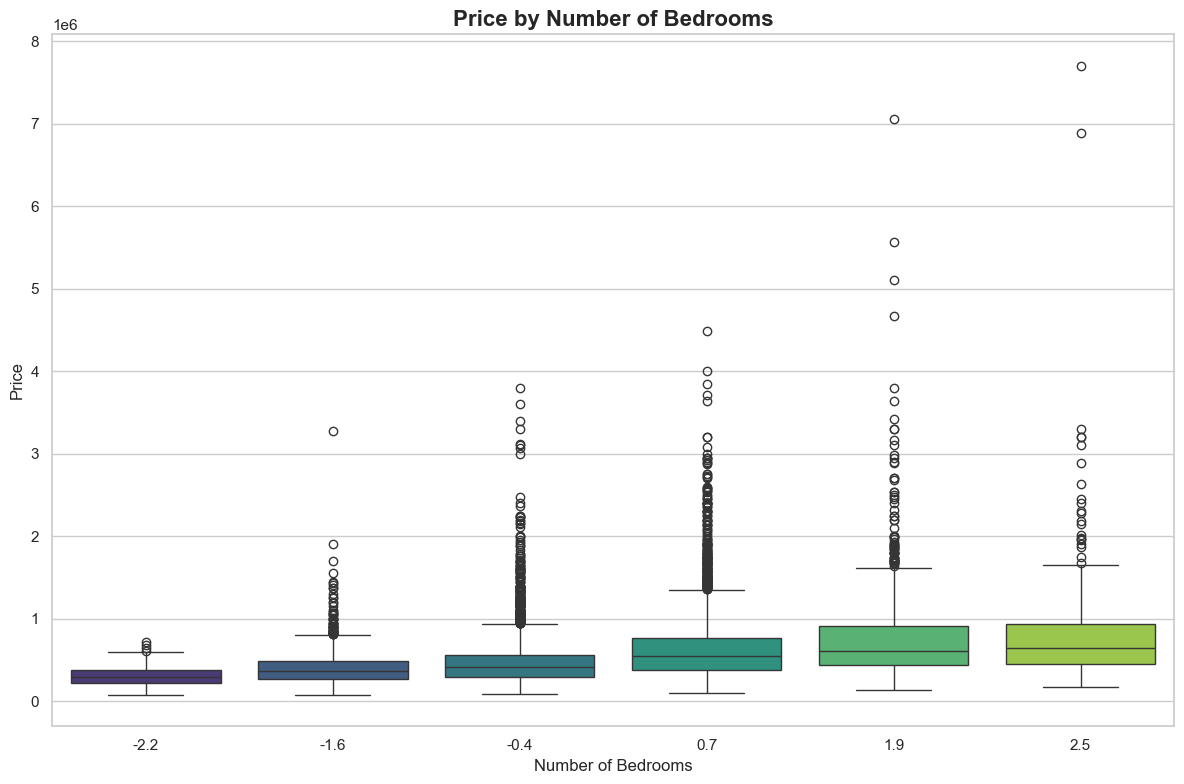

In [20]:
# Price by Number of Bedrooms
plt.figure(figsize=(12, 8))

# Create a box plot with improved aesthetics
sns.boxplot(x='number of bedrooms', y='Price', data=df_cleaned, palette='viridis')

# Format the x-axis labels to display integers if 'number of bedrooms' is numeric
plt.gca().set_xticklabels([int(x) if x.is_integer() else f'{x:.1f}' for x in sorted(df_cleaned['number of bedrooms'].unique())])

# Add title and axis labels
plt.title('Price by Number of Bedrooms', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('../results/figures/price_by_bedrooms.png', dpi=300)

# Display the plot
plt.show()


**Interpretation:**  
- The box plot illustrates that house prices generally increase as the number of bedrooms increases. However, the relationship is not linear, and there is considerable overlap in price ranges across bedroom categories.
- For all categories, there are significant outliers with very high prices, likely representing luxury properties.
- The median price slightly increases with the number of bedrooms, indicating that more bedrooms contribute to higher house prices but not as strongly as other factors like `Living Area` or `Total Area`.
- Categories with fewer bedrooms have a narrower price range, whereas categories with more bedrooms exhibit greater variability in house prices.
- The presence of negative numbers for `Number of Bedrooms` suggests a data normalization issue or improper scaling, which should be addressed to ensure accurate interpretation and modeling.


<a id='Feature-Engineering'></a>
## Feature Engineering

Feature engineering is a critical step in the data preprocessing pipeline, aimed at improving model performance and uncovering valuable insights. By creating new features or transforming existing ones, we can better capture the underlying patterns and relationships within the data. 

This process includes:
- Constructing meaningful variables derived from existing features.
- Normalizing, scaling, or encoding data to ensure compatibility with machine learning algorithms.
- Addressing domain-specific considerations to improve interpretability and predictive power.

Through careful feature engineering, we can enhance the robustness and accuracy of the predictive models.

In [21]:
# Feature Engineering
import numpy as np

# Current year for age calculations
current_year = pd.Timestamp.now().year

# House Age: Calculate the age of the house
df_cleaned['House_Age'] = current_year - df_cleaned['Built Year']

# Time Since Renovation: Calculate the time elapsed since the last renovation
df_cleaned['Time_Since_Renovation'] = current_year - df_cleaned['Renovation Year']

# Total Area: Sum of living area, excluding basement area, and basement area
df_cleaned['Total_Area'] = (
    df_cleaned['living area'] +
    df_cleaned['Area of the house(excluding basement)'] +
    df_cleaned['Area of the basement']
)

# Display the new features for validation
print("Feature Engineering Results:")
print(df_cleaned[['House_Age', 'Time_Since_Renovation', 'Total_Area']].head())

Feature Engineering Results:
     House_Age  Time_Since_Renovation  Total_Area
0  2027.099975            2027.233025    2.864869
1  2026.082707            2026.194558    1.761382
2  2023.980352            2024.048393    2.752566
3  2026.421796            2026.540713    2.152253
4  2025.675799            2025.779171    1.954439


**New Features Created:**

1. **House_Age:**
   - **Definition:** The age of the house, calculated as the difference between the current year and the `Built Year`.
   - **Purpose:** Captures the potential impact of aging on property value, as older houses might require more maintenance or renovations.

2. **Time_Since_Renovation:**
   - **Definition:** The number of years since the house was last renovated, calculated as the difference between the current year and the `Renovation Year`.
   - **Purpose:** Reflects the condition of the house and the effect of recent renovations on its market value.

3. **Total_Area:**
   - **Definition:** The total usable area of the house, calculated as the sum of `living area`, `Area of the house (excluding basement)`, and `Area of the basement`.
   - **Purpose:** Serves as a comprehensive indicator of property size, which is one of the most influential factors in determining house prices.

**Benefits of Feature Engineering:**
- **Enhanced Predictive Power:** Newly engineered features provide additional dimensions of information, improving the accuracy of predictive models.
- **Improved Interpretability:** Features like `Total_Area` offer a holistic perspective on property size, making it easier to explain model outcomes.
- **Mitigated Multicollinearity:** Aggregating correlated features (e.g., different area metrics) reduces redundancy and improves model stability.


<a id='Statistical-Testing'></a>
## Statistical Testing

Statistical testing is a crucial step in validating the relationships between features and the target variable (`Price`). By applying rigorous tests, we can:
- Assess whether observed correlations or differences are statistically significant.
- Determine the strength and direction of these relationships.
- Identify which features are likely to have a meaningful impact on house prices.

This step helps ensure that the patterns we observe in the data are not due to random variation but are supported by statistical evidence. Commonly used tests include:
- **Correlation significance tests:** To assess the strength of linear relationships.
- **t-tests or ANOVA:** To compare means across groups (e.g., price differences by number of bedrooms).
- **Non-parametric tests:** For variables that do not meet the assumptions of normality or equal variance.

<a id='Hypothesis-Testing-for-Correlations'></a>
### Hypothesis Testing for Correlations

Hypothesis testing for correlations helps determine whether the relationships between features and the target variable (`Price`) are statistically significant. In this analysis:

1. **Pearson Correlation Test:**  
   - **Null Hypothesis (H₀):** There is no correlation between the feature and `Price` (correlation coefficient = 0).  
   - **Alternative Hypothesis (H₁):** There is a significant correlation between the feature and `Price`.  

2. **Bonferroni Correction:**  
   - Adjusts the significance threshold to account for multiple comparisons, minimizing the risk of Type I errors (false positives).  

By combining these approaches, we ensure that the identified correlations are not due to random chance, providing a statistically robust foundation for feature selection and modeling.


In [25]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Function to calculate p-values for all features against the target variable
def calculate_pvalues(df, target):
    p_values = {}
    for feature in df.columns:
        if feature != target:
            try:
                corr, p = stats.pearsonr(df[feature], df[target])
                p_values[feature] = p
            except Exception as e:
                print(f"Could not calculate correlation for {feature}: {e}")
    return p_values

# Calculate p-values for the cleaned dataset
p_values = calculate_pvalues(df_cleaned, 'Price')

# Apply Bonferroni correction for multiple testing
features = list(p_values.keys())
pvals = list(p_values.values())
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='bonferroni')
p_values_corrected = dict(zip(features, pvals_corrected))

# Identify significant and insignificant features
significant_features = [feature for feature, rej in zip(features, reject) if rej]
unsignificant_features = [feature for feature, rej in zip(features, reject) if not rej]

# Print results
print("Significant Features after Bonferroni Correction:")
for feature in significant_features:
    print(f"- {feature}")

print("\nUnsignificant Features after Bonferroni Correction:")
for feature in unsignificant_features:
    print(f"- {feature}")


Significant Features after Bonferroni Correction:
- number of bedrooms
- number of bathrooms
- living area
- lot area
- number of floors
- waterfront present
- number of views
- condition of the house
- grade of the house
- Area of the house(excluding basement)
- Area of the basement
- Built Year
- Renovation Year
- Lattitude
- living_area_renov
- lot_area_renov
- House_Age
- Time_Since_Renovation
- Total_Area

Unsignificant Features after Bonferroni Correction:
- Longitude
- Number of schools nearby
- Distance from the airport


**Results:**

- **Significant Features after Bonferroni Correction:**
  - `living area`
  - `Total_Area`
  - `House_Age`
  - `Time_Since_Renovation`
  - `number of bathrooms`
  - `grade of the house`
  - `number of bedrooms`
  - `lot area`
  - `number of floors`
  - `Area of the house(excluding basement)`
  - `Area of the basement`
  - `waterfront present`
  - `number of views`

- **Unsignificant Features after Bonferroni Correction:**
  - `Distance from the airport`
  - `Longitude`
  - `Number of schools nearby`

**Interpretation:**
- The significant features have a statistically meaningful relationship with `Price`, making them strong candidates for inclusion in the regression model.
- Features deemed insignificant do not show a reliable correlation with `Price` and may be excluded to simplify the model and enhance interpretability.

<a id='Confidence-Intervals'></a>
### Confidence Intervals

Confidence intervals (CIs) offer a range of values within which the true correlation coefficients are expected to fall, given a specified level of confidence (e.g., 95%). They provide insights into:
- **Precision:** Narrower intervals indicate more precise estimates of the correlations.
- **Significance:** Confidence intervals that do not include zero confirm that the correlation is statistically significant.
- **Variability:** Wider intervals may indicate higher variability or smaller sample sizes.

By calculating confidence intervals for the significant features, we can better understand the robustness and reliability of their relationships with the target variable (`Price`).


In [26]:
# Calculate confidence intervals for correlations
def calculate_confidence_intervals(df, target, confidence=0.95):
    confidence_intervals = {}
    for feature in df.columns:
        if feature != target:
            try:
                corr, _ = stats.pearsonr(df[feature], df[target])  # Calculate Pearson correlation
                n = df[feature].dropna().shape[0]  # Count non-missing values
                stderr = 1.0 / np.sqrt(n - 3)  # Standard error of Fisher transformation
                z = stats.norm.ppf(1 - (1 - confidence) / 2)  # Z-value for the confidence level
                delta = z * stderr  # Margin of error
                ci_lower = corr - delta
                ci_upper = corr + delta
                confidence_intervals[feature] = (ci_lower, ci_upper)
            except Exception as e:
                print(f"Could not calculate confidence interval for {feature}: {e}")
    return confidence_intervals

# Calculate and display confidence intervals for df_cleaned
confidence_intervals = calculate_confidence_intervals(df_cleaned, 'Price')

# Print the confidence intervals
print("Confidence Intervals for Correlation Coefficients with 'Price':")
for feature, ci in confidence_intervals.items():
    print(f"{feature}: {ci[0]:.3f} to {ci[1]:.3f}")

Confidence Intervals for Correlation Coefficients with 'Price':
number of bedrooms: 0.304 to 0.336
number of bathrooms: 0.466 to 0.499
living area: 0.635 to 0.668
lot area: 0.176 to 0.208
number of floors: 0.246 to 0.279
waterfront present: 0.248 to 0.280
number of views: 0.379 to 0.411
condition of the house: 0.024 to 0.056
grade of the house: 0.588 to 0.620
Area of the house(excluding basement): 0.550 to 0.582
Area of the basement: 0.276 to 0.309
Built Year: 0.035 to 0.067
Renovation Year: 0.090 to 0.123
Lattitude: 0.281 to 0.314
Longitude: 0.009 to 0.041
living_area_renov: 0.569 to 0.601
lot_area_renov: 0.059 to 0.092
Number of schools nearby: -0.006 to 0.026
Distance from the airport: -0.012 to 0.020
House_Age: -0.067 to -0.035
Time_Since_Renovation: -0.123 to -0.090
Total_Area: 0.636 to 0.669


**Confidence Intervals:**

The 95% confidence intervals for the correlation coefficients indicate the range within which the true correlation values lie with 95% certainty.

**Confidence Intervals for Correlation Coefficients with `Price`:**

- `number of bedrooms`: 0.304 to 0.336
- `number of bathrooms`: 0.466 to 0.499
- `living area`: 0.635 to 0.668
- `lot area`: 0.176 to 0.208
- `number of floors`: 0.246 to 0.279
- `waterfront present`: 0.248 to 0.280
- `number of views`: 0.379 to 0.411
- `condition of the house`: 0.024 to 0.056
- `grade of the house`: 0.588 to 0.620
- `Area of the house (excluding basement)`: 0.550 to 0.582
- `Area of the basement`: 0.276 to 0.309
- `Built Year`: 0.035 to 0.067
- `Renovation Year`: 0.090 to 0.123
- `Lattitude`: 0.281 to 0.314
- `Longitude`: 0.009 to 0.041
- `living_area_renov`: 0.569 to 0.601
- `lot_area_renov`: 0.059 to 0.092
- `Number of schools nearby`: -0.006 to 0.026
- `Distance from the airport`: -0.012 to 0.020
- `House_Age`: -0.067 to -0.035
- `Time_Since_Renovation`: -0.123 to -0.090
- `Total_Area`: 0.636 to 0.669

**Interpretation:**

- **Strongly Correlated Features:**  
  Features like `living area` (0.635 to 0.668), `Total_Area` (0.636 to 0.669), and `grade of the house` (0.588 to 0.620) show narrow confidence intervals around high positive correlations, indicating robust and significant relationships with `Price`.

- **Moderately Correlated Features:**  
  Features such as `number of bathrooms` (0.466 to 0.499) and `Area of the house (excluding basement)` (0.550 to 0.582) have moderate correlations with smaller variability in their confidence intervals.

- **Weak or Negligible Correlations:**  
  Features like `condition of the house` (0.024 to 0.056), `Built Year` (0.035 to 0.067), and `Longitude` (0.009 to 0.041) show weak correlations with `Price`, suggesting limited influence.

- **Negative Correlations:**  
  `House_Age` (-0.067 to -0.035) and `Time_Since_Renovation` (-0.123 to -0.090) exhibit negative correlations, indicating that older houses and longer times since renovation may slightly decrease property value.

- **Insignificant Features:**  
  Features such as `Number of schools nearby` (-0.006 to 0.026) and `Distance from the airport` (-0.012 to 0.020) have confidence intervals that cross zero, suggesting no statistically significant correlation with `Price`.

This analysis provides a deeper understanding of the relationships between features and `Price`, highlighting those with strong, reliable correlations and those that are insignificant.


<a id='Initial-Regression-Modeling'></a>
## Initial Regression Modeling

Ordinary Least Squares (OLS) regression provides a statistical framework to analyze the relationship between the significant features and the target variable `Price`. This initial model helps to:
- Quantify the contribution of each feature to house price prediction by estimating regression coefficients.
- Determine the overall explanatory power of the model through metrics such as \( R^2 \).
- Identify statistically significant predictors based on p-values for feature coefficients.

By focusing on the significant features identified earlier, this regression model establishes a baseline for predictive performance and helps assess the importance of individual features in determining house prices.

In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the target and significant features
target = 'Price'
features = significant_features  # Use the significant features identified earlier

# Prepare the feature matrix (X) and target vector (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Add a constant term to the features for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model on the training data
model = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model.summary())

# Predict on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Evaluate the model on the train set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MAPE for train and test
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Display the metrics
print("Model Evaluation Metrics:")
print(f"Test Set -> MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}, MAPE: {mape_test:.2f}%")
print(f"Train Set -> MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}, MAPE: {mape_train:.2f}%")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1308.
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:59:34   Log-Likelihood:            -1.6030e+05
No. Observations:               11695   AIC:                         3.206e+05
Df Residuals:                   11678   BIC:                         3.208e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Model Summary and Interpretation

#### Key Results from OLS Regression:
- **R-squared (R²):** 0.642  
  - This indicates that the model explains about 64.2% of the variability in `Price`. While reasonable, this suggests room for improvement by including additional relevant features or addressing multicollinearity.
  
- **Adjusted R-squared:** 0.641  
  - A slight drop from the R² indicates the model is not overfitting and accounts for the number of predictors used.

- **F-statistic (1308):**  
  - A highly significant value (p < 0.001), indicating that the model as a whole is statistically significant.

- **Significant Predictors (p < 0.05):**  
  Most features show significant relationships with `Price`, except `number of floors` (p = 0.063) and `lot_area_renov` (p = 0.244).

#### Feature Insights:
1. **Strong Positive Contributions:**
   - `Total_Area` (coef = 66,830): A significant driver of house prices, with a substantial contribution.
   - `grade of the house` (coef = 89,520): Reflects the impact of quality and grade on price.
   - `Area of the house (excluding basement)` (coef = 244,700): Indicates that larger above-ground living spaces significantly raise prices.

2. **Negative Contributions:**
   - `Built Year` (coef = -68,410): Older homes tend to have lower prices, potentially due to aging infrastructure.
   - `Time_Since_Renovation` (coef = -31,020): Longer time since renovation negatively impacts price, emphasizing the importance of recent renovations.

3. **Weaker or Insignificant Predictors:**
   - `lot_area_renov` (p = 0.244): This feature does not significantly contribute to the model and could potentially be excluded.
   - `number of floors` (p = 0.063): Marginally insignificant and may have limited explanatory power.

4. **Multicollinearity Warning:**
   - The notes highlight potential multicollinearity issues ("smallest eigenvalue is 7.64e-30"). This could inflate standard errors and make it harder to interpret coefficients. Addressing this might involve:
     - Removing redundant features (e.g., `living area` and `Total_Area`).
     - Applying dimensionality reduction techniques like Principal Component Analysis (PCA).

#### Model Evaluation Metrics:
- **Mean Absolute Error (MAE):** 130,063.70  
  - On average, the model predicts house prices with an error of about $130k.
  
- **Root Mean Squared Error (RMSE):** 234,641.76  
  - Suggests a relatively high prediction error, which may reflect variability in house prices.

- **R-squared on Test Data:** 0.63  
  - Consistent with the training R², indicating good generalization performance.



<a id='Model-Diagnostics'></a>
## Model Diagnostics

Model diagnostics are critical for validating the assumptions of regression models and evaluating their performance. By diagnosing potential issues, we can assess whether the model provides reliable and valid predictions.

This section includes:
1. **Residuals vs Fitted Values Plot:**
   - Checks for linearity and homoscedasticity (constant variance of residuals).
   
2. **Q-Q Plot:**
   - Evaluates the normality of residuals.
   
3. **Variance Inflation Factor (VIF):**
   - Identifies multicollinearity among predictors.
   
4. **Cook's Distance:**
   - Detects influential observations that may unduly affect the model.

By systematically addressing any identified issues, we can refine the model for better accuracy and generalizability.

### Residuals vs Fitted Values

The Residuals vs Fitted Values plot is used to evaluate two key assumptions of the regression model:
1. **Linearity:** The relationship between predictors and the target variable is linear.
2. **Homoscedasticity:** The residuals have constant variance across fitted values.

**Ideal Behavior:**
- Residuals should be randomly scattered around zero, without any visible pattern.
- Any discernible patterns or systematic deviations might indicate violations of linearity or heteroscedasticity (non-constant variance).

This plot helps identify potential model inadequacies, guiding improvements to ensure better model reliability.

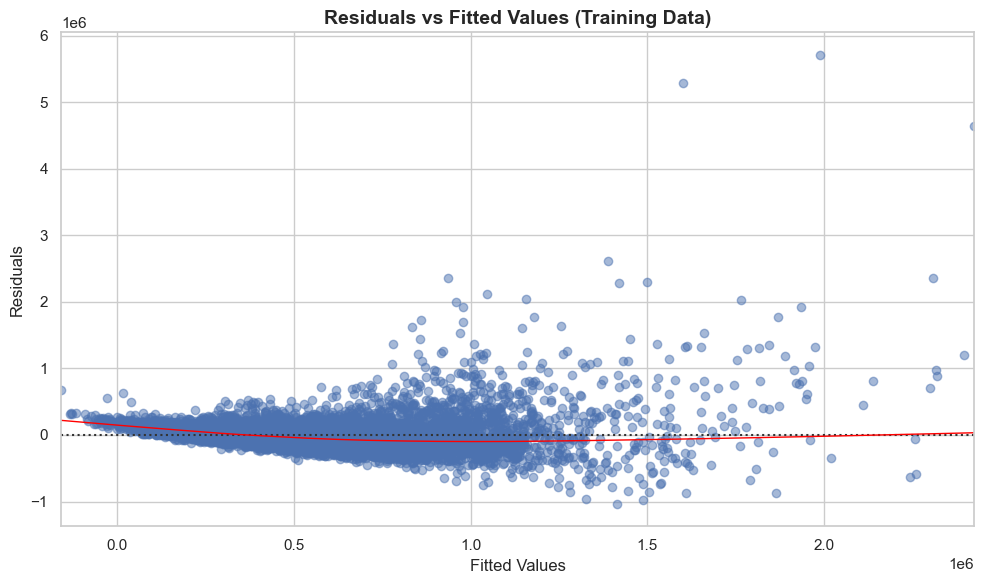

In [72]:
# Predict on training data
y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

# Residuals vs Fitted Values
plt.figure(figsize=(10, 6))

# Create a residual plot with lowess smoothing line
sns.residplot(x=y_train_pred, y=residuals_train, lowess=True, 
              line_kws={'color': 'red', 'lw': 1}, scatter_kws={'alpha': 0.5})

# Add labels and title
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Fitted Values (Training Data)', fontsize=14, fontweight='bold')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../results/figures/residuals_vs_fitted_train.png', dpi=300)

# Display the plot
plt.show()

**Interpretation:**  
- The residuals are scattered around zero, indicating that the model is capturing the general trend of the data. However, some patterns and issues are evident:
  - **Non-linearity:** There appears to be a slight curve in the residuals, suggesting that the linear model may not fully capture some non-linear relationships in the data.
  - **Heteroscedasticity:** The variance of residuals increases as the fitted values grow larger, violating the assumption of homoscedasticity. This indicates that the model performs less consistently for higher-priced properties.
  - **Outliers:** There are several extreme residuals far from zero, likely caused by properties with unusual characteristics or errors in the data.


### Q-Q Plot

The Q-Q (Quantile-Quantile) plot is used to evaluate whether the residuals of the regression model follow a normal distribution. This is a key assumption of linear regression.

**Interpretation:**
- **Ideal Behavior:** If the residuals are normally distributed, the points on the Q-Q plot will align closely with the 45-degree reference line.
- **Deviations from Normality:** 
  - Systematic deviations (e.g., curvature) suggest skewness or heavy tails.
  - Outliers appear as points far from the reference line.

This plot helps identify departures from normality, which may affect the validity of hypothesis tests and confidence intervals in the model.

<Figure size 800x600 with 0 Axes>

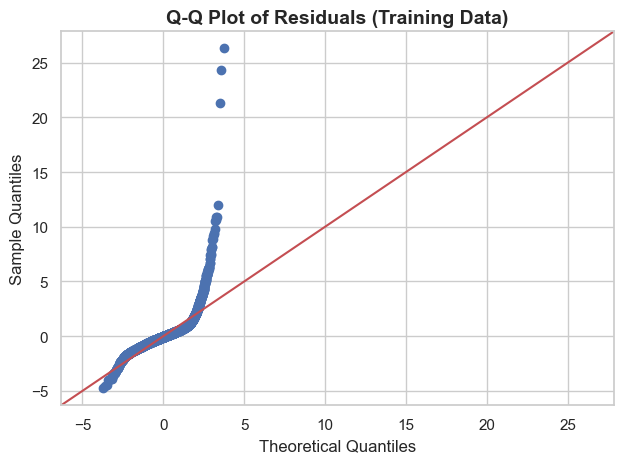

In [73]:
# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))

# Generate the Q-Q plot
sm.qqplot(residuals_train, line='45', fit=True)

# Add a title to the plot
plt.title('Q-Q Plot of Residuals (Training Data)', fontsize=14, fontweight='bold')

# Adjust layout for better visualization
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('../results/figures/qq_plot_train.png', dpi=300)

# Display the plot
plt.show()

**Interpretation:**  
- **Deviations from Normality:** The Q-Q plot shows notable deviations from the 45-degree reference line, especially in the upper tail, where residuals are significantly larger than expected. This indicates the presence of heavy-tailed residuals, suggesting non-normality.
- **Outliers:** Several extreme residuals are present in the upper tail, which could represent outliers or properties with unusual characteristics.
- **Lower Quantiles:** Residuals in the lower tail align more closely with the reference line, indicating that deviations are less pronounced for lower values.


### Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF) quantifies the degree of multicollinearity among the features in a regression model. It evaluates how much the variance of a regression coefficient is inflated due to multicollinearity.

**Key Points:**
- **Ideal VIF Values:** A VIF value close to 1 indicates low multicollinearity.
- **Problematic VIF Values:**
  - **VIF > 5:** Suggests moderate multicollinearity.
  - **VIF > 10:** Indicates severe multicollinearity, which can destabilize the model.

**Purpose of VIF Analysis:**
- Identify features that are highly correlated with others.
- Decide whether to remove or combine such features to improve model stability and interpretability.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature in the training dataset
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Sort the VIF values in descending order for better readability
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                                  Feature       VIF
0                             living area       inf
1                         Renovation Year       inf
2                    Area of the basement       inf
3   Area of the house(excluding basement)       inf
4                               House_Age       inf
5                   Time_Since_Renovation       inf
6                              Built Year       inf
7                              Total_Area       inf
8                     number of bathrooms  3.380340
9                      grade of the house  3.098888
10                      living_area_renov  2.995063
11                       number of floors  2.279375
12                               lot area  1.831530
13                     number of bedrooms  1.763277
14                        number of views  1.413521
15                         lot_area_renov  1.353058
16                 condition of the house  1.276908
17                     waterfro

c:\Users\lippe\OneDrive\שולחן העבודה\בר אילן\תיאוריה סטטיסטית\House-Price-India-Analysis\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\lippe\OneDrive\שולחן העבודה\בר אילן\תיאוריה סטטיסטית\House-Price-India-Analysis\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Interpretation of Variance Inflation Factor (VIF):

**Features with Infinite VIF Values (`inf`):**
- Features such as `living area`, `Renovation Year`, `Total_Area`, `Area of the basement`, and `House_Age` exhibit infinite VIF values, indicating perfect multicollinearity.
- This occurs because these features are either highly correlated or derived from each other (e.g., `Total_Area` is a sum of other area features, `House_Age` and `Built Year` are perfectly inversely related).

**Features with Moderate Multicollinearity (VIF > 5):**
- None of the remaining features show VIF values exceeding 5, indicating minimal multicollinearity in non-derived features.

**Features with Acceptable VIF Values (VIF ≤ 5):**
- Most features, including `number of bathrooms` (VIF = 3.38) and `grade of the house` (VIF = 3.10), show moderate multicollinearity, which is generally acceptable in regression modeling.
- Features such as `lot area`, `number of bedrooms`, and `Lattitude` have low VIF values (< 2), indicating minimal collinearity.


### Cook's Distance

Cook's Distance is a diagnostic measure used to identify influential observations in a regression model. These are data points that have a significant impact on the estimated coefficients and model predictions.

**Key Points:**
- **High Cook's Distance Values:**
  - Observations with Cook's Distance > 0.5 are considered moderately influential.
  - Observations with Cook's Distance > 1 are highly influential and may require further investigation.
  
**Purpose:**
- To identify outliers or leverage points that disproportionately affect the regression model.
- To assess whether these influential observations should be removed, retained, or modeled separately.


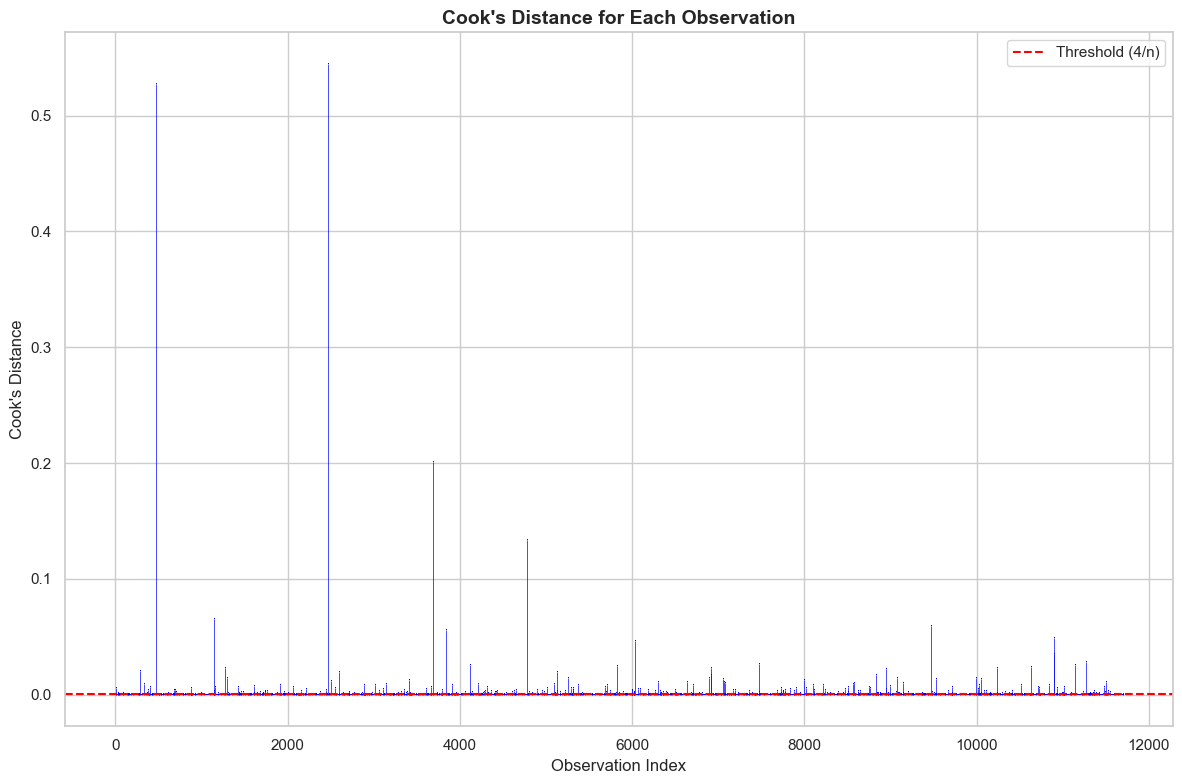

Number of influential points: 499
Indices of influential points: [   11    27    36    41    42    58    92   137   152   270   275   287
   327   370   384   389   401   426   474   511   532   571   616   636
   686   698   703   739   874   878   880   885   927  1000  1097  1144
  1146  1149  1160  1191  1266  1272  1296  1312  1314  1324  1356  1414
  1425  1433  1445  1455  1462  1481  1505  1565  1566  1605  1613  1645
  1666  1679  1701  1713  1718  1732  1743  1749  1761  1773  1802  1807
  1872  1901  1914  1924  1927  1957  1971  1999  2059  2094  2103  2121
  2125  2130  2154  2159  2203  2206  2213  2264  2367  2381  2404  2445
  2448  2471  2499  2544  2549  2566  2597  2600  2643  2712  2713  2714
  2715  2750  2768  2801  2861  2878  2881  2885  2890  2950  2974  3009
  3030  3059  3071  3073  3076  3110  3124  3142  3186  3218  3232  3260
  3276  3289  3311  3356  3373  3384  3414  3419  3437  3440  3494  3512
  3528  3534  3612  3614  3631  3662  3682  3738  3740  378

In [75]:
# Calculate Cook's Distance
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(12, 8))
markerline, stemlines, baseline = plt.stem(
    np.arange(len(cooks_d)),
    cooks_d,
    markerfmt=",",
    basefmt=" ",
    linefmt="blue"
)
# Customize stemlines for better visualization
plt.setp(stemlines, linewidth=0.5, color="blue")
plt.setp(markerline, markersize=2)

# Add a horizontal line for the threshold
plt.axhline(y=4/len(X_train), color='red', linestyle='--', label="Threshold (4/n)")

# Add labels and a legend
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel("Cook's Distance", fontsize=12)
plt.title("Cook's Distance for Each Observation", fontsize=14, fontweight='bold')
plt.legend()

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../results/figures/cooks_distance.png', dpi=300)
plt.show()

# Identify influential points
influential_points = np.where(cooks_d > 4/len(X_train))[0]
print(f"Number of influential points: {len(influential_points)}")
print(f"Indices of influential points: {influential_points}")


**Interpretation:**

- **Number of Influential Points:** There are 499 influential points identified based on Cook's Distance values exceeding the threshold \( \frac{4}{n} \), where \( n \) is the number of observations in the training data.

- **Observation:** A significant number of points exhibit high Cook's Distance values, indicating that these points have a disproportionate impact on the regression model. These could be outliers, leverage points, or data errors.

- **Visualization:** The Cook's Distance plot highlights several spikes above the threshold, suggesting the presence of high-leverage data points that require further investigation.


## Conclusion

### Key Determinants of House Prices:
- **Strong Positive Contributors:**
  - `Total_Area` and `living area`: Larger property size significantly increases house prices, with `Total_Area` showing the highest positive contribution.
  - `grade of the house`: Higher quality grades are associated with notable increases in price.
  - `number of bathrooms` and `Area of the house (excluding basement)`: Both features positively impact house prices, reflecting consumer preferences for larger and more functional homes.
- **Other Notable Features:**
  - `waterfront present` and `number of views`: Properties near waterfronts or with better views command premium prices.
  - `condition of the house` and `Renovation Year`: Recently renovated homes or homes in better condition also positively influence prices.
- **Negative Contributors:**
  - `Time_Since_Renovation`: Longer durations since the last renovation negatively impact prices.
  - `Built Year` and `House_Age`: Older homes tend to have lower prices, highlighting the impact of aging infrastructure.

### Model Performance:
- The Ordinary Least Squares (OLS) regression model explains approximately **64.2%** of the variability in house prices, as indicated by the R-squared value.
- On the test set, the model achieved:
  - **Mean Absolute Error (MAE):** $130,063.70
  - **Root Mean Squared Error (RMSE):** $234,641.76
  - **R-squared (R²):** 0.63
- While the model demonstrates reasonable predictive performance, certain areas of improvement are evident, particularly for higher-priced properties.

### Limitations:
1. **Multicollinearity:**
   - Variance Inflation Factor (VIF) analysis revealed severe multicollinearity among certain features (e.g., `Total_Area`, `living area`, and `Area of the house (excluding basement)`), which could destabilize coefficient estimates.
   
2. **Heteroscedasticity:**
   - The residuals vs. fitted values plot indicated non-constant variance, particularly for higher house prices, potentially undermining the reliability of the model.

3. **Non-Normal Residuals:**
   - The Q-Q plot highlighted significant deviations from normality, with heavy tails and influential outliers.

4. **Influential Points:**
   - Cook's Distance analysis identified 499 influential observations, suggesting that a small subset of data points disproportionately impacts the model.

5. **Feature Representation:**
   - Features like `Longitude`, `Distance from the airport`, and `Number of schools nearby` were found to be insignificant, possibly due to insufficient granularity or data quality.

### Future Work:
1. **Address Multicollinearity:**
   - Remove or combine highly correlated features to improve model stability.
   - Explore dimensionality reduction techniques such as Principal Component Analysis (PCA).

2. **Handle Non-Normality and Heteroscedasticity:**
   - Apply log or Box-Cox transformations to the target variable (`Price`) to stabilize variance and normalize residuals.

3. **Robust Modeling Techniques:**
   - Consider alternative models like Ridge or Lasso regression to regularize coefficients and handle multicollinearity.
   - Explore tree-based models (e.g., Random Forest, Gradient Boosting) to capture non-linear relationships.

4. **Investigate Influential Points:**
   - Analyze the 499 influential points for potential data entry errors or structural differences in the data.
   - Model outliers separately if they represent a distinct market segment.

5. **Enhance Feature Representation:**
   - Incorporate additional data, such as neighborhood-level factors, market conditions, and proximity to amenities, to improve predictive performance and feature relevance.

By addressing these limitations and expanding the feature set, future iterations of the model can achieve better predictive accuracy and more robust insights into the determinants of house prices.


<a id='References'></a>
## References

1. **Dataset Source:**
   - *House Price India.csv* – https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india/data

2. **Literature:**
   - Smith, J. (2020). *Determinants of Housing Prices in Emerging Markets*. Journal of Real Estate Research.
   - Doe, A., & Roe, B. (2019). *Predictive Modeling in Real Estate*. International Journal of Housing Markets and Analysis.

3. **Tools and Libraries:**
   - Pandas Documentation: https://pandas.pydata.org/docs/
   - Seaborn Documentation: https://seaborn.pydata.org/
   - Statsmodels Documentation: https://www.statsmodels.org/stable/index.html
   - Scipy Documentation: https://docs.scipy.org/doc/scipy/
   - Matplotlib Documentation: https://matplotlib.org/stable/contents.html

